In [1]:
%pylab inline
%matplotlib inline
import io
import h5py 
import pandas as pd
import scipy as sp
import numpy as np
from PIL import Image
from fractions import Fraction

from scipy import optimize 
from scipy.optimize import curve_fit,least_squares
from lmfit.models import GaussianModel
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colorbar import ColorbarBase, make_axes_gridspec


Populating the interactive namespace from numpy and matplotlib


## corner trapezoid

In [ ]:

Angles = 12
fileName = [[] for i in range((Angles))]
dfs = []
numpydf = []
position = []
distance = []
for i in range(Angles):
    prefix1 = 'LXe_corner_LCE_nt_'    
    csv ='.csv'
    i=i  
    fileName[i].append(f'{prefix1}{i}{csv}')
    dfs.append(pd.read_csv(fileName[i][0], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs[i]['LCE']=dfs[i]['SiPM Hits']/dfs[i]['Photons']
    dfs[i]['log(LCE)']=log(dfs[i]['SiPM Hits']/dfs[i]['Photons'])
    numpydf.append(dfs[i].to_numpy())
    position.append(numpydf[i][:,3:6])
    position[i][:,2]=position[i][:,2]-min(position[i][:,2])
    position[i]= position[i]/25.4
    distance.append(sqrt(sum(position[i]**2,axis=1)))
    dfs[i]['z_pos'] = position[i][:,2].tolist()
    dfs[i]['y_pos'] = position[i][:,1].tolist()
    dfs[i]['x_pos'] = position[i][:,0].tolist()
    dfs[i]['Distance'] = distance[i].tolist()
    


energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 130
LCE_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs)): 
    dfs[i] = dfs[i][dfs[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs[i] = dfs[i][dfs[i]['Photons']>=photon_threshold]
    dfs[i] = dfs[i][dfs[i]['LCE']>=LCE_threshold]
    dfs[i] = dfs[i][dfs[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs[i] = dfs[i][dfs[i]['Distance']>=distance_threshold]    
bins =64
mins = np.zeros((Angles))
maxs = np.zeros((Angles))
for i in range(Angles):
    mins[i]= np.min(distance[i])
    maxs[i]= np.max(distance[i])
xmin = np.min(mins) 
xmax = np.min(maxs)
be = np.linspace(xmin,xmax,bins+1)
bc = be[:-1] + np.diff(be) / 2.
average = np.zeros((Angles,bins))
# for j in range(Angles):
#     arraY = distance[j]
#     for i in range(bins):
#         msk = arraY>=be[i] 
#         mask = arraY<be[i+1]
#         mk = msk = mask
#         average[j,i] = dfs[j]['LCE'][mk].mean()
# plt.figure(figsize=(16,10))
# for i in range(Angles):    
#     plot(bc,average[i],label='{}'.format(i),lw=1)
# legend()   
# show()    

## center trapezoid


Angles_c = 14
fileName = [[] for i in range((Angles_c))]
dfs_c = []
numpydf_c = []
position_c = []
distance_c = []
for i in range(Angles_c):
    prefix1 = 'LXe_center_LCE_nt_'    
    csv ='.csv'
    i=i  
    fileName[i].append(f'{prefix1}{i}{csv}')
    dfs_c.append(pd.read_csv(fileName[i][0], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs_c[i]['LCE']=dfs_c[i]['SiPM Hits']/dfs_c[i]['Photons']
    dfs_c[i]['log(LCE)']=log(dfs_c[i]['SiPM Hits']/dfs_c[i]['Photons'])
    numpydf_c.append(dfs_c[i].to_numpy())
    position_c.append(numpydf_c[i][:,3:6])
    position_c[i][:,2]=position_c[i][:,2]-min(position_c[i][:,2])
    position_c[i]= position_c[i]/25.4
    distance_c.append(sqrt(sum(position_c[i]**2,axis=1)))
    dfs_c[i]['z_pos'] = position_c[i][:,2].tolist()
    dfs_c[i]['y_pos'] = position_c[i][:,1].tolist()
    dfs_c[i]['x_pos'] = position_c[i][:,0].tolist()
    dfs_c[i]['Distance'] = distance_c[i].tolist()
bins =64
mins = np.zeros((Angles_c))
maxs = np.zeros((Angles_c))
for i in range(Angles_c):
    mins[i]= np.min(distance_c[i])
    maxs[i]= np.max(distance_c[i])
xmin = np.min(mins) 
xmax = np.min(maxs)
be = np.linspace(xmin,xmax,bins+1)
bc_c = be[:-1] + np.diff(be) / 2.
average_c = np.zeros((Angles_c,bins))
for j in range(Angles_c):
    arraY = distance_c[j]
    for i in range(bins):
        msk = arraY>=be[i] 
        mask = arraY<be[i+1]
        mk = msk = mask
        average_c[j,i] = dfs_c[j]['LCE'][mk].mean()

energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 130
LCE_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs_c)): 
    dfs_c[i] = dfs_c[i][dfs_c[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs_c[i] = dfs_c[i][dfs_c[i]['Photons']>=photon_threshold]
    dfs_c[i] = dfs_c[i][dfs_c[i]['LCE']>=LCE_threshold]
    dfs_c[i] = dfs_c[i][dfs_c[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs_c[i] = dfs_c[i][dfs_c[i]['Distance']>=distance_threshold]
dfs_c[0]
plt.figure(figsize=(16,10))
for i in range(Angles_c):
    plot(bc_c,average_c[i],label='shape {}'.format(i),lw=1)
legend()
plt.title('LCE vs distance')
plt.ylabel('LCE')
plt.xlabel('distance from SiPM (inch)')
show()   

## side trap

## side trap

Angles_s = 2
fileName_s = ['LXe_nt_0.csv']
dfs_s = []
numpydf_s = []
position_s = []
distance_s = []
for i in range(Angles_s):

    dfs_s.append(pd.read_csv(fileName_s[i], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs_s[i]['LCE']=dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons']
    dfs_s[i]['log(LCE)']=log(dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons'])
    numpydf_s.append(dfs_s[i].to_numpy())
    position_s.append(numpydf_s[i][:,3:6])
    position_s[i][:,2]=position_s[i][:,2]-min(position_s[i][:,2])
    position_s[i]= position_s[i]/25.4
    distance_s.append(sqrt(sum(position_s[i]**2,axis=1)))
    dfs_s[i]['z_pos'] = position_s[i][:,2].tolist()
    dfs_s[i]['y_pos'] = position_s[i][:,1].tolist()
    dfs_s[i]['x_pos'] = position_s[i][:,0].tolist()
    dfs_s[i]['Distance'] = distance_s[i].tolist()
bins =64
mins = np.zeros((Angles_s))
maxs = np.zeros((Angles_s))
for i in range(Angles_s):
    mins[i]= np.min(distance_s[i])
    maxs[i]= np.max(distance_s[i])
xmin = np.min(mins) 
xmax = np.min(maxs)
be = np.linspace(xmin,xmax,bins+1)
bc_s = be[:-1] + np.diff(be) / 2.
average_s = np.zeros((Angles_s,bins))
for j in range(Angles_s):
    arraY = distance_s[j]
    for i in range(bins):
        msk = arraY>=be[i] 
        mask = arraY<be[i+1]
        mk = msk = mask
        average_s[j,i] = dfs_s[j]['LCE'][mk].mean()

energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 130
LCE_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs_s)): 
    dfs_s[i] = dfs_s[i][dfs_s[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Photons']>=photon_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['LCE']>=LCE_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Distance']>=distance_threshold]
dfs_s[0]
plt.figure(figsize=(16,10))
for i in range(Angles_s):
    plot(bc_s,average_s[i],label='shape {}'.format(i),lw=1)
legend()
plt.title('LCE vs distance')
plt.ylabel('LCE')
plt.xlabel('distance from SiPM (inch)')
show()   

## Final geometry

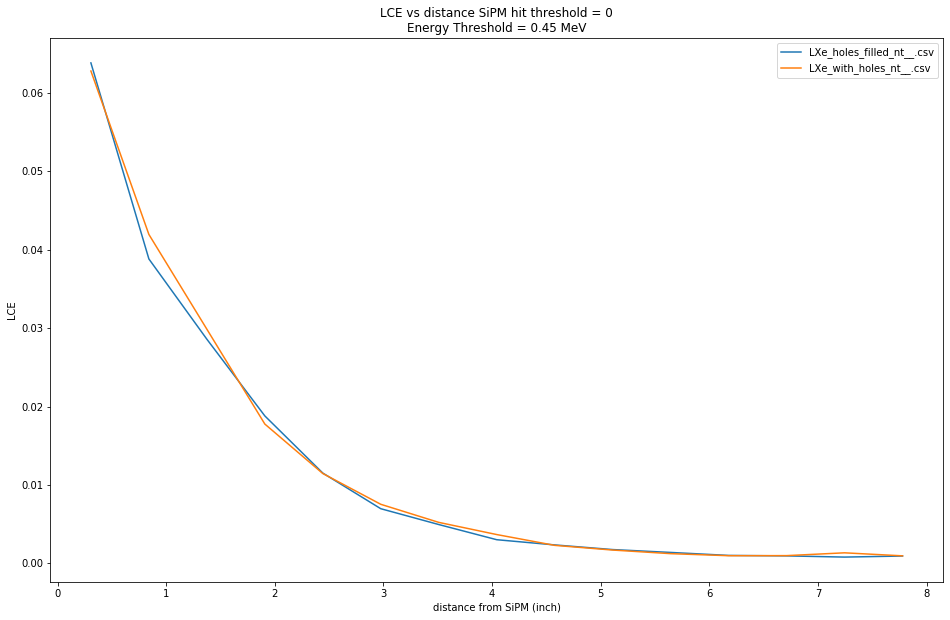

engery threshold = 0.45 MeV


In [136]:
## side trap with 45 degree end and holes filled with scintillator material and not filled
## 

Angles_s = 2
fileName_s = ['LXe_holes_filled_nt__.csv','LXe_with_holes_nt__.csv']
dfs_s = []
numpydf_s = []
position_s = []
distance_s = []
for i in range(Angles_s):

    dfs_s.append(pd.read_csv(fileName_s[i], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs_s[i]['LCE']=dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons']
    dfs_s[i]['log(LCE)']=log(dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons'])
    numpydf_s.append(dfs_s[i].to_numpy())
    position_s.append(numpydf_s[i][:,3:6])
    position_s[i][:,2]=position_s[i][:,2]-min(position_s[i][:,2])
    position_s[i]= position_s[i]/25.4
    distance_s.append(sqrt(sum(position_s[i]**2,axis=1)))
    dfs_s[i]['z_pos'] = position_s[i][:,2].tolist()
    dfs_s[i]['y_pos'] = position_s[i][:,1].tolist()
    dfs_s[i]['x_pos'] = position_s[i][:,0].tolist()
    dfs_s[i]['Distance'] = distance_s[i].tolist()
dfs_s[0].to_csv('LXe_holes_filled.csv', na_rep='(missing)')
dfs_s[1].to_csv('LXe_with_holes.csv', na_rep='(missing)')


numpydf_s_filtered = []
### Set various thresholds
LCE_threshold = 0.0
energy_deposit_threshold = 0.45 #MeV
photon_threshold = 0
SiPM_hit_threshold = 0
distance_threshold_min =  0 #inch
distance_threshold_max = 8.1
for i in range(len(dfs_s)): 
    dfs_s[i] = dfs_s[i][dfs_s[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Photons']>=photon_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['LCE']>=LCE_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Distance']>=distance_threshold_min]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Distance']<=distance_threshold_max]
    numpydf_s_filtered.append(dfs_s[i].to_numpy())
dfs_s[0].to_csv('LXe_hole_filled_filtered.csv', na_rep='(missing)') 
dfs_s[1].to_csv('LXe_with_hole_filtered.csv', na_rep='(missing)')
# numpydf_s_filtered = dfs_s[0].to_numpy()

### Set bins for distance LCE histograms
bins =15

distance_idx = 0 ## full data
# distance_idx = int(bins/2) ## halfway  
mins = np.zeros((Angles_s))
maxs = np.zeros((Angles_s))
for i in range(Angles_s):
    mins[i]= np.min(distance_s[i])
    maxs[i]= np.max(distance_s[i])
xmin = np.min(mins) 
xmax = np.min(maxs)
be = np.linspace(xmin,xmax,bins+1)
bc_s = be[:-1] + np.diff(be) / 2.
average_s = np.zeros((Angles_s,bins))
for j in range(Angles_s):
    for i in range(bins):
        df = dfs_s[j]
        df = df[df['Distance']>=be[i]]
        df = df[df['Distance']<be[i+1]]
        average_s[j,i] = df['LCE'].mean()       

plt.figure(figsize=(16,10))
for i in range(Angles_s):
    plot(bc_s[distance_idx:],average_s[i][distance_idx:],label=fileName_s[i])
legend()
plt.title('LCE vs distance SiPM hit threshold = {}\nEnergy Threshold = {} MeV'.format(SiPM_hit_threshold,energy_deposit_threshold))
plt.ylabel('LCE')
plt.xlabel('distance from SiPM (inch)')
show()
print('engery threshold = {} MeV'.format(energy_deposit_threshold))


# Polyhedron of detector.  
# verticies for trace of detector
xv = np.array([-7,-7,-7,-7,-7,-7,-7,-7,
               7,7,-7,-7,22,22,-7,22,
               22,-7,22,22,-7,22,22,-7,
               22,7,7,22,22])/25.4
yv = np.array([7,14.5,14.5,0.5,-14.5,-14.5,-7,7,
               7,-7,-7,-14.5,-14.5,-14.5,-14.5,-14.5,
               0.5,0.5,0.5,14.5,14.5,14.5,14.5,14.5,
               14.5,7,-7,-14.5,14.5])/25.4
zv = np.array([0,15,203.2,203.2,188.2,15,0,0,
               0,0,0,15,15,188.2,188.2,188.2,
              203.2,203.2,203.2,203.2,203.2,203.2,15,15,
              15,0,0,15,15])/25.4

### 3D plot
import plotly.express as px
import plotly.graph_objs as go

fig = px.scatter_3d(dfs_s[0], x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)',title='No Holes')
fig.update_scenes(aspectmode='data')
fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_size=1.5, selector=dict(type='scatter3d'))
fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
fig.add_traces(go.Scatter3d(
                    x = xv.tolist(),
                    y = zv.tolist(),
                    z = yv.tolist(),
                    mode = 'lines',
                    showlegend=False,
                    line_width=5,   # edge thickness of polyhedron
                    line={'color': 'rgb(0.0, 255.0, 1.0)'},  #polyhedron edge color
    
))
fig.show()
fig = px.scatter_3d(dfs_s[1], x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)',title='With Holes')
fig.update_scenes(aspectmode='data')
fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_size=1.5, selector=dict(type='scatter3d'))
fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
fig.add_traces(go.Scatter3d(
                    x = xv.tolist(),
                    y = zv.tolist(),
                    z = yv.tolist(),
                    mode = 'lines',
                    showlegend=False,
                    line_width=5,   # edge thickness of polyhedron
                    line={'color': 'rgb(0.0, 255.0, 1.0)'},  #polyhedron edge color
    
))
fig.show()


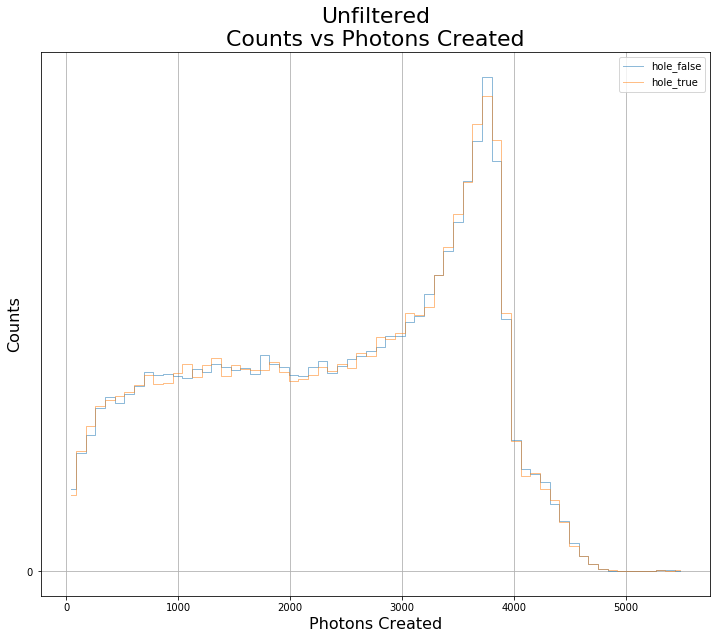

Holes False average Photons Created = 2402.64007
Holes True average Photons Created = 2404.88844


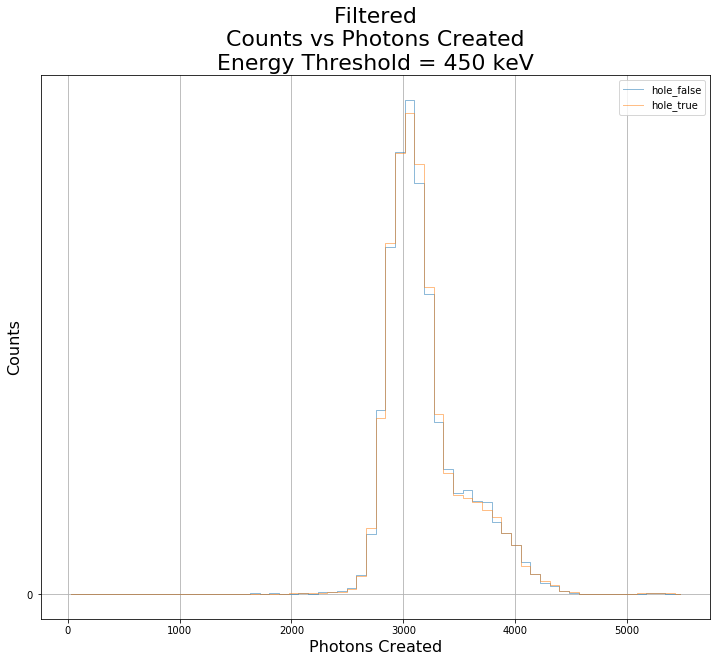

Holes False average Photons Created = 0.01085
Holes True average Photons Created = 0.01094
The difference is very small.


In [154]:
## Histogram

holes_false = numpydf_s[0]
holes_true = numpydf_s[1]
holes_false_filtered = numpydf_s_filtered[0]
holes_true_filtered = numpydf_s_filtered[1]

titles = ['Energy Deposited','SiPM Hits','Photons Created',
          'X position','Y position','Z position',
         'LCE','Log(LCE)','Distance']
## data index
# 0 Energy deposited
# 1 SiPM hits
# 2 Photons
# 3 X position
# 4 Y position
# 5 Z position
# 6 LCE
# 7 log(LCE)
# 8 Distance from SiPM center
idx = 2  # Choose data for histogram
bins= 64
xmin = np.min([holes_false[:,idx].min(),holes_true[:,idx].min()])
xmax = np.max([holes_false[:,idx].max(),holes_true[:,idx].max()])

be = np.linspace(xmin,xmax,bins+1)

bc = be[:-1] + np.diff(be) / 2.
bc_ = be[:-1] + np.diff(be_) / 2.
count_f, _ = np.histogram(holes_false[:,idx], bins = be, density=True)
count_t, _ = np.histogram(holes_true[:,idx], bins = be, density=True)


plt.figure(figsize=(12,10))
plt.title('Unfiltered\nCounts vs {}'.format(titles[idx]),fontsize=22)
plt.plot(bc, count_f, drawstyle='steps-mid',lw=1,alpha=0.5,label='hole_false')
plt.plot(bc, count_t, drawstyle='steps-mid',lw=1,alpha=0.5,label='hole_true')
plt.yscale('symlog')
plt.ylabel('Counts',fontsize=16)
plt.xlabel(titles[idx],fontsize=16)
plt.grid()
plt.legend()
plt.show()

print('Holes False average {} = {:.5f}'.format(titles[idx],holes_false[:,idx].mean()))
print('Holes True average {} = {:.5f}'.format(titles[idx],holes_true[:,idx].mean()))

## filtered from above
xmin_filtered = np.min([holes_false_filtered[:,idx].min(),holes_true_filtered[:,idx].min()])
xmax_filtered = np.max([holes_false_filtered[:,idx].max(),holes_true_filtered[:,idx].max()])

be_filtered = np.linspace(xmin_filtered,xmax_filtered,bins+1)

bc_filtered = be[:-1] + np.diff(be_filtered) / 2.
bc_ = be[:-1] + np.diff(be_) / 2.
count_f_filtered, _ = np.histogram(holes_false_filtered[:,idx], bins = be_filtered, density=True)
count_t_filtered, _ = np.histogram(holes_true_filtered[:,idx], bins = be_filtered, density=True)


plt.figure(figsize=(12,10))
plt.title('Filtered\nCounts vs {}\nEnergy Threshold = {:.0f} keV'.format(titles[idx],energy_deposit_threshold*1000),fontsize=22)
plt.plot(bc_filtered, count_f_filtered, drawstyle='steps-mid',lw=1,alpha=0.5,label='hole_false')
plt.plot(bc_filtered, count_t_filtered, drawstyle='steps-mid',lw=1,alpha=0.5,label='hole_true')
plt.yscale('symlog')
plt.ylabel('Counts',fontsize=16)
plt.xlabel(titles[idx],fontsize=16)
plt.grid()
plt.legend()
plt.show()
print('Holes False average {} = {:.5f}'.format(titles[idx],dfs_s[0]['LCE'].mean()))
print('Holes True average {} = {:.5f}'.format(titles[idx],dfs_s[1]['LCE'].mean()))
print('The difference is very small.')

### Going to try another visualization
## did not work
import dash
from dash import dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

df = dfs_s[0]
app.layout = html.Div([
    dcc.Graph(id="scatter-plot"),
    html.P("LCE"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=1, step=0.01,
        marks={0: '0', 1: '1'},
        value=[0.0, 1]
    ),
])
@app.callback(
    Output("scatter-plot", "figure"), 
    [Input("range-slider", "value")])
def update_bar_chart(slider_range):
    low, high = slider_range
    mask = (df['LCE'] > low) & (df['LCE'] < high)

    fig = px.scatter_3d(dfs_s[0][mask], x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)')
    fig.update_scenes(aspectmode='data')
    fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
    fig.update_traces(marker_size=1.5, selector=dict(type='scatter3d'))
    fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
    fig.add_traces(go.Scatter3d(
                    x = xv.tolist(),
                    y = zv.tolist(),
                    z = yv.tolist(),
                    mode = 'lines',
                    showlegend=False,
                    line_width=5,   # edge thickness of polyhedron
                    line={'color': 'rgb(0.0, 255.0, 1.0)'},  #polyhedron edge color
        ))
    return fig
app.run_server(debug=False)
    
   




## side trap no cut at the end

Angles_s = 3
fileName_s = ['LXe_nt_0.csv','LXe_nt_45.csv','LXe_nt_60.csv']
dfs_s = []
numpydf_s = []
position_s = []
distance_s = []
for i in range(Angles_s):

    dfs_s.append(pd.read_csv(fileName_s[i], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs_s[i]['LCE']=dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons']
    dfs_s[i]['log(LCE)']=log(dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons'])
    numpydf_s.append(dfs_s[i].to_numpy())
    position_s.append(numpydf_s[i][:,3:6])
    position_s[i][:,2]=position_s[i][:,2]-min(position_s[i][:,2])
    position_s[i]= position_s[i]/25.4
    distance_s.append(sqrt(sum(position_s[i]**2,axis=1)))
    dfs_s[i]['z_pos'] = position_s[i][:,2].tolist()
    dfs_s[i]['y_pos'] = position_s[i][:,1].tolist()
    dfs_s[i]['x_pos'] = position_s[i][:,0].tolist()
    dfs_s[i]['Distance'] = distance_s[i].tolist()
LCE_threshold = 0.0
energy_deposit_threshold = 0.45
photon_threshold = 0
SiPM_hit_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs_s)): 
    dfs_s[i] = dfs_s[i][dfs_s[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Photons']>=photon_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['LCE']>=LCE_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Distance']>=distance_threshold]    
       
bins =15
distance_idx = 0 ## full data
# distance_idx = int(bins/2) ## halfway  
mins = np.zeros((Angles_s))
maxs = np.zeros((Angles_s))
for i in range(Angles_s):
    mins[i]= np.min(distance_s[i])
    maxs[i]= np.max(distance_s[i])
xmin = np.min(mins) 
xmax = np.min(maxs)
be = np.linspace(xmin,xmax,bins+1)
bc_s = be[:-1] + np.diff(be) / 2.
average_s = np.zeros((Angles_s,bins))
for j in range(Angles_s):
    for i in range(bins):
        df = dfs_s[j]
        df = df[df['Distance']>=be[i]]
        df = df[df['Distance']<be[i+1]]
        average_s[j,i] = df['LCE'].mean()       

# plt.figure(figsize=(16,10))
# for i in range(3):
#     plot(bc_s[distance_idx:],average_s[i][distance_idx:],label=fileName_s[i])
# legend()
# plt.title('LCE vs distance SiPM hit threshold = {}\nfull cone data'.format(SiPM_hit_threshold))
# plt.ylabel('LCE')
# # plt.yscale('symlog')
# plt.xlabel('distance from SiPM (inch)')
# show()
print('engery threshold = {} MeV'.format(energy_deposit_threshold))
import plotly.express as px
fig = px.scatter_3d(dfs_s[1], x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)')
fig.update_scenes(aspectmode='data')
fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_size=1.5, selector=dict(type='scatter3d'))
fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
fig.show()




import plotly.express as px
for i in range(Angles_s):
    fig = px.scatter_3d(dfs_s[i], x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)')
    fig.update_scenes(aspectmode='data')
    fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
    fig.update_traces(marker_size=1.5, selector=dict(type='scatter3d'))
    fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
    fig.show()




##corner cone
## side trap no cut at the end

Angles_s = 3
fileName_s = ['LXe_cone_nt_0.csv','LXe_cone_nt_45.csv','LXe_cone_nt_60.csv']
dfs_s = []
numpydf_s = []
position_s = []
distance_s = []
for i in range(Angles_s):
    dfs_s.append(pd.read_csv(fileName_s[i], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs_s[i]['LCE']=dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons']
    dfs_s[i]['log(LCE)']=log(dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons'])
    numpydf_s.append(dfs_s[i].to_numpy())
    position_s.append(numpydf_s[i][:,3:6])
    position_s[i][:,2]=position_s[i][:,2]-min(position_s[i][:,2])
    position_s[i]= position_s[i]/25.4
    distance_s.append(sqrt(sum(position_s[i]**2,axis=1)))
    dfs_s[i]['z_pos'] = position_s[i][:,2].tolist()
    dfs_s[i]['y_pos'] = position_s[i][:,1].tolist()
    dfs_s[i]['x_pos'] = position_s[i][:,0].tolist()
    dfs_s[i]['Distance'] = distance_s[i].tolist()

energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 0
LCE_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs_s)): 
    dfs_s[i] = dfs_s[i][dfs_s[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Photons']>=photon_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['LCE']>=LCE_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Distance']>=distance_threshold]    
       
bins =20
mins = np.zeros((Angles_s))
maxs = np.zeros((Angles_s))
for i in range(Angles_s):
    mins[i]= np.min(distance_s[i])
    maxs[i]= np.max(distance_s[i])
xmin = np.min(mins) 
xmax = np.min(maxs)
be = np.linspace(xmin,xmax,bins+1)
bc_s = be[:-1] + np.diff(be) / 2.
average_s = np.zeros((Angles_s,bins))
for j in range(Angles_s):
    for i in range(bins):
        df = dfs_s[j]
        df = df[df['Distance']>=be[i]]
        df = df[df['Distance']<be[i+1]]
        average_s[j,i] = df['LCE'].mean()       

plt.figure(figsize=(16,10))
for i in range(3):
    plot(bc_s[int(bins/2):],average_s[i][int(bins/2):],label=fileName_s[i])
legend()
plt.title('LCE vs distance SiPM hit threshold = {}'.format(SiPM_hit_threshold),fontsize=22)
plt.ylabel('LCE')
# plt.yscale('symlog')
plt.xlabel('distance from SiPM (inch)')
show()   


##corner cone with holes filled
## side trap no cut at the end

Angles_s = 3
fileName_s = ['LXe____nt_0.csv','LXe____nt_45.csv','LXe____nt_60.csv']
dfs_s = []
numpydf_s = []
position_s = []
distance_s = []
for i in range(Angles_s):
    dfs_s.append(pd.read_csv(fileName_s[i], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs_s[i]['LCE']=dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons']
    dfs_s[i]['log(LCE)']=log(dfs_s[i]['SiPM Hits']/dfs_s[i]['Photons'])
    numpydf_s.append(dfs_s[i].to_numpy())
    position_s.append(numpydf_s[i][:,3:6])
    position_s[i][:,2]=position_s[i][:,2]-min(position_s[i][:,2])
    position_s[i]= position_s[i]/25.4
    distance_s.append(sqrt(sum(position_s[i]**2,axis=1)))
    dfs_s[i]['z_pos'] = position_s[i][:,2].tolist()
    dfs_s[i]['y_pos'] = position_s[i][:,1].tolist()
    dfs_s[i]['x_pos'] = position_s[i][:,0].tolist()
    dfs_s[i]['Distance'] = distance_s[i].tolist()

energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 0
LCE_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs_s)): 
    dfs_s[i] = dfs_s[i][dfs_s[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Photons']>=photon_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['LCE']>=LCE_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs_s[i] = dfs_s[i][dfs_s[i]['Distance']>=distance_threshold]    
       
bins =20
mins = np.zeros((Angles_s))
maxs = np.zeros((Angles_s))
for i in range(Angles_s):
    mins[i]= np.min(distance_s[i])
    maxs[i]= np.max(distance_s[i])
xmin = np.min(mins) 
xmax = np.min(maxs)
be = np.linspace(xmin,xmax,bins+1)
bc_s = be[:-1] + np.diff(be) / 2.
average_s = np.zeros((Angles_s,bins))
for j in range(Angles_s):
    for i in range(bins):
        df = dfs_s[j]
        df = df[df['Distance']>=be[i]]
        df = df[df['Distance']<be[i+1]]
        average_s[j,i] = df['LCE'].mean()       

plt.figure(figsize=(16,10))
for i in range(3):
    plot(bc_s[int(bins/2):],average_s[i][int(bins/2):],label=fileName_s[i])
legend()
plt.title('LCE vs distance SiPM hit threshold = {}'.format(SiPM_hit_threshold),fontsize=22)
plt.ylabel('LCE')
# plt.yscale('symlog')
plt.xlabel('distance from SiPM (inch)')
show()   

##### Trap on both ends

Angles_f = 3
fileName_f = [[] for i in range((Angles_f))]
dfs_f = []
numpydf_f = []
position_f = []
distance_f = []
for i in range(Angles_f):
    prefix1 = 'LXe_final_nt_'    
    csv ='.csv'
    i=i
    j = 5*i
    fileName_f[i].append(f'{prefix1}{j}{csv}')
    dfs_f.append(pd.read_csv(fileName_f[i][0], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs_f[i]['LCE']=dfs_f[i]['SiPM Hits']/dfs_f[i]['Photons']
    dfs_f[i]['log(LCE)']=log(dfs_f[i]['SiPM Hits']/dfs_f[i]['Photons'])
    numpydf_f.append(dfs_f[i].to_numpy())
    position_f.append(numpydf_f[i][:,3:6])
    position_f[i][:,2]=position_f[i][:,2]-min(position_f[i][:,2])
    position_f[i]= position_f[i]/25.4
    distance_f.append(sqrt(sum(position_f[i]**2,axis=1)))
    dfs_f[i]['z_pos'] = position_f[i][:,2].tolist()
    dfs_f[i]['y_pos'] = position_f[i][:,1].tolist()
    dfs_f[i]['x_pos'] = position_f[i][:,0].tolist()
    

bins =64
mins_f = np.zeros((Angles_f))
maxs_f = np.zeros((Angles_f))
for i in range(Angles_f):
    mins_f[i]= np.min(distance_f[i])
    maxs_f[i]= np.max(distance_f[i])
xmin_f = np.min(mins_f) 
xmax_f = np.min(maxs_f)
be_f = np.linspace(xmin,xmax,bins+1)
bc_f = be_f[:-1] + np.diff(be_f) / 2.
average_f = np.zeros((Angles,bins))
for j in range(Angles_f):
    arraY = distance_f[j]
    for i in range(bins):
        msk = arraY>=be[i] 
        mask = arraY<be[i+1]
        mk = msk = mask
        average_f[j,i] = dfs_f[j]['LCE'][mk].mean()
plt.figure(figsize=(16,10))
plot(bc_c,average_c[6],label='no hole 0',lw=1)
for i in range(Angles_f):    
    plot(bc_f,average_f[i],label='{}'.format(i),lw=1)
 
legend()  
show()    

## Most recent run with most hits

## Filter data ##
fileName = 'LXe_Final_nt_12.csv'  #  1.2 in far end trapezoid height
energy_deposit_threshold = 0.45
photon_threshold = 1000
SiPM_hit_threshold = 0
LCE_threshold = 0
distance_threshold = 1.0

dfs_0 = pd.read_csv(fileName, sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos'))
dfs_0['LCE']=dfs_0['SiPM Hits']/dfs_0['Photons']
dfs_0['log(LCE)']=log(dfs_0['SiPM Hits']/dfs_0['Photons'])
numpydf_0= dfs_0.to_numpy()
position_0=numpydf_0[:,3:6]
position_0[:,2]=position_0[:,2]-min(position_0[:,2])
position_0= position_0/25.4
distance_0= (sqrt(sum(position_0**2,axis=1)))
dfs_0['z_pos'] = position_0[:,2].tolist()
dfs_0['y_pos'] = position_0[:,1].tolist()
dfs_0['x_pos'] = position_0[:,0].tolist()
dfs_0['Distance'] = distance_0.tolist()
dfs_0 = dfs_0[dfs_0['Energy Deposited']>=energy_deposit_threshold]
dfs_0 = dfs_0[dfs_0['Photons']>=photon_threshold]
dfs_0 = dfs_0[dfs_0['LCE']>=LCE_threshold]
dfs_0 = dfs_0[dfs_0['SiPM Hits']>=SiPM_hit_threshold]


import plotly.express as px
fig = px.scatter_3d(dfs_0, x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)')
fig.update_scenes(aspectmode='data')
fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_size=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
fig.show()
dfs_0



# corner and center comparison at each SiPM side trapezoid
k=10
import plotly.express as px
fig = px.scatter_3d(dfs[k], x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)')
fig.update_scenes(aspectmode='data')
fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_size=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
fig.show()

fig = px.scatter_3d(dfs_c[k], x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)')
fig.update_scenes(aspectmode='data')
fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_size=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
fig.show()

print('Total SiPM hits Center trap normalize to rectangle')
LCE_c = []
for i in range(Angles_c):
    LCE_c.append(np.sum(dfs_c[i]['SiPM Hits'])/np.sum(dfs_c[0]['SiPM Hits']))
    print('{:.3f}'.format(np.sum(dfs_c[i]['SiPM Hits'])/np.sum(dfs_c[0]['SiPM Hits'])),'Shape {}'.format(i))
    plot(LCE_c)

print('Total SiPM hits Corner trap normalize to rectangle')
for i in range(Angles):
    print('{:.3f}'.format(np.sum(dfs[i]['SiPM Hits'])/np.sum(dfs[0]['SiPM Hits'])),'Shape {}'.format(i))

print('Total SiPM hits Center trap normalize to number of hits')
for i in range(Angles_c):
    print('{:.3f}'.format(np.sum(dfs_c[i]['SiPM Hits'])/len(dfs_c[i])),'Shape {}'.format(i))

print('Total SiPM hits Corner trap normalize to number of hits')
for i in range(Angles):
    print('{:.3f}'.format(np.sum(dfs[i]['SiPM Hits'])/len(dfs[i])),'Shape {}'.format(i))

print('Total SiPM hits Center trap per photons')
LCE_c = []
for i in range(Angles_c):
    LCE_c.append(100*np.sum(dfs_c[i]['SiPM Hits'])/np.sum(dfs_c[i]['Photons']))
    print('{:.5f} %'.format(100*np.sum(dfs_c[i]['SiPM Hits'])/np.sum(dfs_c[i]['Photons'])),'Shape {}'.format(i))
plot(LCE_c)


dfs_LCE =[]
print('Total SiPM hits Corner trap per photons')
for i in range(Angles):
    dfs_LCE.append(100*np.sum(dfs[i]['SiPM Hits'])/np.sum(dfs[i]['Photons']))
    print('{:.5f} %'.format(100*np.sum(dfs[i]['SiPM Hits'])/np.sum(dfs[i]['Photons'])),'Shape {}'.format(i))
    plot(dfs_LCE)

print('Total SiPM hits Center trap per photons')
for i in range(Angles_c):
    print('{:.5f} %'.format(100*np.sum(dfs_c[i]['SiPM Hits'])/np.sum(dfs_c[i]['Photons'])),'Shape {}'.format(i))

for i in range(Angles_f):
    

    fig = px.scatter_3d(dfs_f[i], x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)')
    fig.update_scenes(aspectmode='data')
    fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
    fig.update_traces(marker_size=1, selector=dict(type='scatter3d'))
    fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
    fig.show()

k =1
fig = px.scatter_3d(dfs_f[k], x ='x_pos', y ='z_pos', z ='y_pos', color='log(LCE)')
fig.update_scenes(aspectmode='data')
fig.update_traces(opacity=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_size=1, selector=dict(type='scatter3d'))
fig.update_traces(marker_colorscale='Hot', selector=dict(type='scatter3d'))
fig.show()

## double trap data

for i in range(Angles_f):
    print(i)
    bc = np.linspace(0,1500,32)
    histo = hist((dfs_f[0]['SiPM Hits']),bins=bc,log=True ,alpha=0.5)
    histo_c = hist((dfs_f[i]['SiPM Hits']),bins=bc,log=True, alpha=0.5)
   
    show()

bc = np.linspace(0,1500,64)

for i in range(Angles):
    histo = hist((dfs[6]['SiPM Hits']),bins=bc,log=True ,alpha=0.5)
    histo_f = hist((dfs_f[i]['SiPM Hits']),bins=bc,log=True, alpha=0.5)
    

    
    show()